# Exp3. 고양이 수염 스티커 만들기

# [1번 시도] 정면 사진

## Step0. 라이브러리 불러오기

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🛸")

🛸


## Step1. 이미지 불러오기

OpenCV는 BGR 이미지이기에 이미지를 불러오고 RGB로 이미지를 변경하였다.

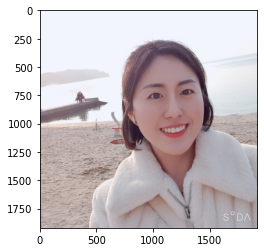

In [2]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/image1.jpg'
img_bgr = cv2.imread(my_image_path)    # opencv로 이미지 불러오기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)     # BGR → RGB 이미지로 변경

img_show = img_bgr.copy()    # 출력용 이미지 따로 보관

plt.imshow(img_rgb)
plt.show()

## Step2. 얼굴 & 랜드마크 검출하기

### 2-1) bounding box 출력

rectangles[[(798, 576) (1463, 1242)]]


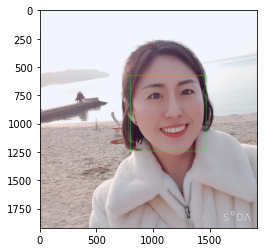

In [3]:
detector_hog = dlib.get_frontal_face_detector()  # dlib을 활용해 hog detector를 선언
dlib_rects = detector_hog(img_rgb, 1)   # 얼굴의 위치를 찾음 / 1은 이미지 피라미드 수 (작은 얼굴을 크게 볼 수 있음)
print(dlib_rects)

for dlib_rect in dlib_rects:     
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType = cv2.LINE_AA)   # bounding box 출력
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 2-2) 랜드마크 검출하기

In [4]:
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)    # landmark 모델 불러오기

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  # 사진의 bounding box 내 landmark 찾기
    list_points = list(map(lambda p:(p.x, p.y), points.parts())) # 튜플로 변환한 landmark 좌표를 리스트로 저장
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


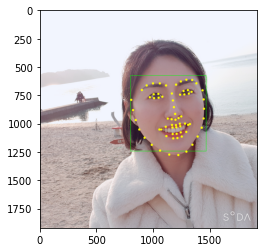

In [5]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)   # 랜드마크가 잘 보이지 않아 10으로 늘려 점을 굵게 만들었다.
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step3. 스티커 적용 위치 확인

landmark의 x, y 좌표 중 번호로만 선택을 할 경우에는 스티커의 위치가 정확하게 맞지 않아서 기본 좌표 값에서 +-를 하였다.

In [6]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[8])     # landmark 좌표 중 8번을 선택
    x = landmark[8][0] - 50      # 8번 landmark의 x좌표 - 50  (세부 위치 조정을 위함)
    y = landmark[8][1] - 20      # 8번 landmark의 y좌표 - 20 (세부 위치 조정을 위함)
    w = h = dlib_rect.width()
    print('(x, y) : (%d, %d)'%(x, y))
    print('(w, h) : (%d, %d)'%(w, h))

(1218, 1277)
(x, y) : (1168, 1257)
(w, h) : (666, 666)


## Step4. 스티커 적용하기

In [7]:
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))   # 스티커 사이즈를 bounding box에 맞춰 리사이징
print (img_sticker.shape)

(666, 666, 3)


In [8]:
refined_x = x - w//2
refined_y = y - h
print('(x, y) : (%d, %d)'%(refined_x, refined_y))

(x, y) : (835, 591)


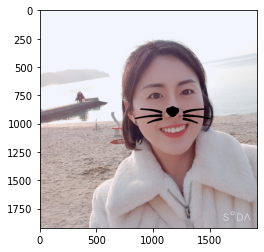

In [9]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] # 원본이미지에서 스티커 이미지가 적용될 위치
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)  # np.where : 조건에 맞는 값 찾아줌 (img_sticker가 0인 부분은 img_sticker 사용, 아닌 부분은 sticker_area 사용)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

------

# [2번 시도] 멀리있는 사진 (→ bounding box 출력x)

멀리있는 사진에서 얼굴을 찾고 bounding box를 출력하였지만 출력이 되지 않았다.  
얼굴이 너무 멀리 있다보니 얼굴 자체를 인식하지 못해서 bounding box를 출력하지 못한 것이 아닐까 생각한다.

## Step1. 이미지 불러오기

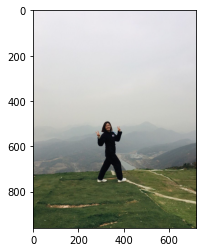

In [10]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/image2_1.jpg'
img_bgr = cv2.imread(my_image_path)   
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)     

img_show = img_bgr.copy()  

plt.imshow(img_rgb)
plt.show()

## Step2. 얼굴 & 랜드마크 검출하기

### 2-1) bounding box 출력

rectangles[]


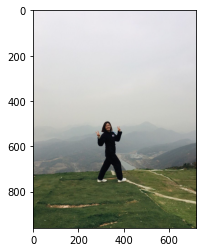

In [11]:
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)  
print(dlib_rects)

for dlib_rect in dlib_rects:     
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType = cv2.LINE_AA)   
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

---

# [3번 시도] 어두운 사진 + 옆모습 (→ bounding box 출력x)

어두운 사진을 불러왔다. 살짝 옆모습이긴 한데 어두운 사진이 거의 없어서 이 사진으로 선택했다.  
하지만 이 사진 또한 bounding box가 출력되지 않았다. 어두운 것이 문제인지, 옆 모습이라 잘 인식이 되지 않은 건지 정확하게 원인을 파악하기 위해 '[4번 시도]'에서 옆모습의 이미지로 진행해보았다.

## Step1. 이미지 불러오기

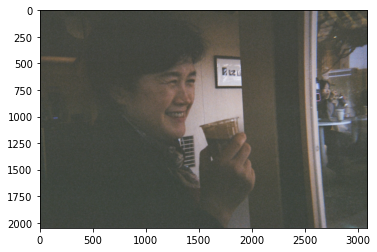

In [12]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/image3.jpg'
img_bgr = cv2.imread(my_image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  

img_show = img_bgr.copy()  

plt.imshow(img_rgb)
plt.show()

## Step2. 얼굴 & 랜드마크 검출하기

### 2-1) bounding box 출력

rectangles[]


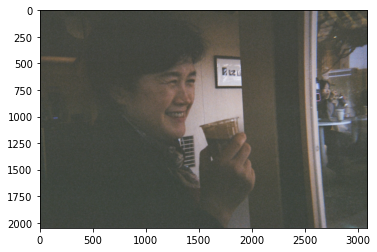

In [13]:
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)   
print(dlib_rects)

for dlib_rect in dlib_rects:     
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType = cv2.LINE_AA) 
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

---

# [4번 시도] 옆 모습

[3번 시도]에서 bounding box가 출력되지 않은 원인을 파악하기 위해 옆 모습 이미지로 진행해보았다. 옆 모습에서는 bounding box가 잘 출력되었다.  
그래서 [3번 시도]에서 출력되지 않은 원인은 어두운 것이지 않을까 생각된다.

## Step1. 이미지 불러오기

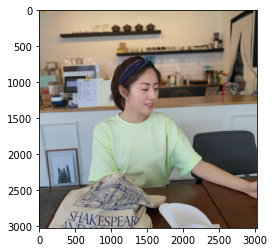

In [14]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/image3_2.jpg'
img_bgr = cv2.imread(my_image_path)    
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  
img_show = img_bgr.copy()  

plt.imshow(img_rgb)
plt.show()

## Step2. 얼굴 & 랜드마크 검출하기

### 2-1) bounding box 출력

rectangles[[(1272, 965) (1734, 1427)]]


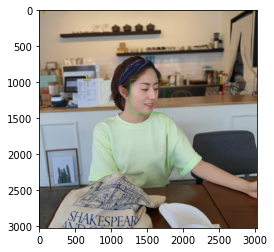

In [15]:
detector_hog = dlib.get_frontal_face_detector() 
dlib_rects = detector_hog(img_rgb, 1) 
print(dlib_rects)

for dlib_rect in dlib_rects:     
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType = cv2.LINE_AA)  
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 2-2) 랜드마크 검출하기

In [16]:
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)    

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  
    list_points = list(map(lambda p:(p.x, p.y), points.parts())) 
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


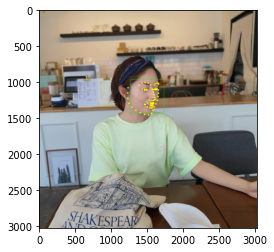

In [17]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1) 
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step3. 스티커 적용 위치 확인

In [18]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[9])
    x = landmark[9][0]
    y = landmark[9][1]
    w = h = dlib_rect.width()
    print('(x, y) : (%d, %d)'%(x, y))
    print('(w, h) : (%d, %d)'%(w, h))

(1558, 1431)
(x, y) : (1558, 1431)
(w, h) : (463, 463)


## Step4. 스티커 적용하기

In [19]:
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print (img_sticker.shape)

(463, 463, 3)


In [20]:
refined_x = x - w//2
refined_y = y - h
print('(x, y) : (%d, %d)'%(refined_x, refined_y))

(x, y) : (1327, 968)


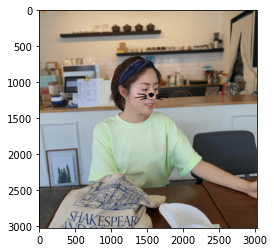

In [21]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

---

# [5번 시도] 2명 이미지

2명의 이미지로 진행하였을 때, bounding box와 landmark는 2명 모두 검출이 되었다.  
하지만 스티커를 적용하였을 때는 한 명만 스티커가 적용이 되었다. 분명 스티커 적용 위치를 확인하였을 때에는 2명의 스티커 적용 위치가 나왔는데 말이다.  
💦 그래서 나의 생각으로 스티커 적용 좌표를 2가지로 만들어서 진행해보았는데 스티커가 2개가 생기긴 하지만, 2개의 스티커 모두 한 사람의 landmark 좌표로만 위치 지정이 되었다. 그래서 x, y 좌표를 +- 해서 다른 사람의 얼굴에도 스티커를 붙이긴 했다.

## Step1. 이미지 불러오기

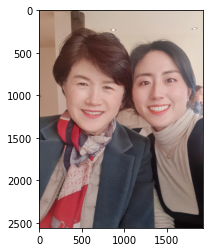

In [22]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/image4.jpg'
img_bgr = cv2.imread(my_image_path)    
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  

img_show = img_bgr.copy() 

plt.imshow(img_rgb)
plt.show()

## Step2. 얼굴 & 랜드마크 검출하기

### 2-1) bounding box 출력

rectangles[[(1019, 650) (1685, 1316)], [(354, 724) (1019, 1390)]]


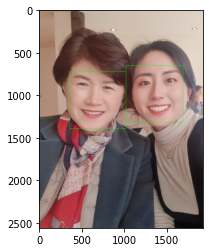

In [23]:
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)  
print(dlib_rects)

for dlib_rect in dlib_rects:     
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType = cv2.LINE_AA)  
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 2-2) 랜드마크 검출하기

In [24]:
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) 

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p:(p.x, p.y), points.parts())) 
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


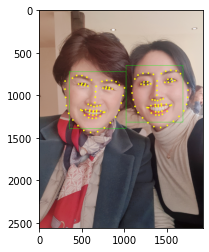

In [25]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1) 
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step3. 스티커 적용 위치 확인

In [26]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[9])
    x_1 = landmark[9][0]
    y_1 = landmark[9][1] - 60
    w_1 = h_1 = dlib_rect.width()
    print('(x_1, y_1) : (%d, %d)'%(x_1, y_1))
    print('(w_1, h_1) : (%d, %d)'%(w_1, h_1))
    
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[14])
    x_2 = landmark[14][0] + 400
    y_2 = landmark[14][1] + 250
    w_2 = h_2 = dlib_rect.width()
    print('(x_2, y_2) : (%d, %d)'%(x_2, y_2))
    print('(w_2, h_2) : (%d, %d)'%(w_2, h_2))

(1502, 1355)
(x_1, y_1) : (1502, 1295)
(w_1, h_1) : (667, 667)
(686, 1428)
(x_1, y_1) : (686, 1368)
(w_1, h_1) : (666, 666)
(1739, 1025)
(x_2, y_2) : (2139, 1275)
(w_2, h_2) : (667, 667)
(962, 1092)
(x_2, y_2) : (1362, 1342)
(w_2, h_2) : (666, 666)


## Step4. 스티커 적용하기

In [27]:
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker_1 = cv2.resize(img_sticker, (w_1, h_1))
img_sticker_2 = cv2.resize(img_sticker, (w_2, h_2))
print (img_sticker_1.shape)
print (img_sticker_2.shape)

(666, 666, 3)
(666, 666, 3)


In [28]:
refined_x_1 = x_1 - w_1//2
refined_y_1 = y_1 - h_1
print('(x_1, y_1) : (%d, %d)'%(refined_x_1, refined_y_1))

refined_x_2 = x_2 - w_2//2
refined_y_2 = y_2 - h_2
print('(x_2, y_2) : (%d, %d)'%(refined_x_2, refined_y_2))

(x_1, y_1) : (353, 702)
(x_2, y_2) : (1029, 676)


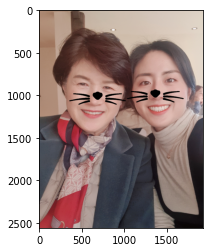

In [29]:
sticker_area = img_bgr[refined_y_1:refined_y_1 +img_sticker_1.shape[0], refined_x_1:refined_x_1+img_sticker_1.shape[1]]
img_bgr[refined_y_1:refined_y_1 +img_sticker_1.shape[0], refined_x_1:refined_x_1+img_sticker_1.shape[1]] = \
    np.where(img_sticker_1==0,img_sticker_1,sticker_area).astype(np.uint8)
sticker_area = img_bgr[refined_y_2:refined_y_2 +img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]]
img_bgr[refined_y_2:refined_y_2 +img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]] = \
    np.where(img_sticker_2==0,img_sticker_2,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

---

# [6번 시도] 여러명 이미지

다른 분들과 함께 여러 명에 수염 붙이는 방법을 이야기해보다가 참고한 코드를 발견했다.  
기존의 코드는 스티커 적용 위치만을 for문을 활용해 확인을 하였다. 그러다보니 스티커 적용 위치는 각 사람 별로 출력이 되지만 이후의 스티커 적용 시에는 한 사람만 되었다.  
참고한 코드는 스티커 적용 위치를 확인하고 얼굴에 스티커를 적용하는 것을 for문을 활용해 반복하여 각 얼굴에 스티커를 적용시켰다.  
'for문'을 개념적으로만 이해를 하고, 적용된 코드에서의 for문도 정확하게 이해를 하지 못하였는데, 해당 코드를 참고하면서 for문을 이렇게 활용하면 되구나라는 것을 알 수 있었다.  
[참고한 코드](https://github.com/ysmNew/Aiffel/blob/main/Ex03/cat.ipynb)

#### ⭐ 문제 발생 ⭐
처음에 마지막 코드를 실행하였을 때는 문제없이 전체 사람에게 스티커가 적용이 되었다. 하지만 다시 [6번 시도]의 코드를 전체 실행을 하였을 때는 에러가 나서 에러가 어떠한 것인지 알아보았다.  
* ValueError: operands could not be broadcast together with shapes (333,333,3) (333,333,3) (241,260,3)  

Broadcasting을 시키려면 기준 축에 있는 원소의 개수가 같아야 하는데, 같지 않아서 발생하는 오류로 보인다. 이 오류를 어떻게 고쳐야 할지 아직 답을 찾지 못했는데, 이 오류를 수정하는 방법을 좀 더 알아봐야겠다.

## Step1. 이미지 불러오기

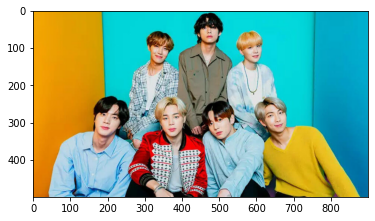

In [30]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/bts.jpg'
img_bgr = cv2.imread(my_image_path)  
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    

img_show = img_bgr.copy() 

plt.imshow(img_rgb)
plt.show()

## Step2. 얼굴 & 랜드마크 검출하기

### 2-1) bounding box 출력

rectangles[[(626, 260) (688, 322)], [(342, 267) (405, 329)], [(567, 84) (619, 136)], [(314, 84) (366, 136)], [(446, 32) (498, 84)], [(170, 267) (232, 329)], [(460, 274) (522, 336)]]


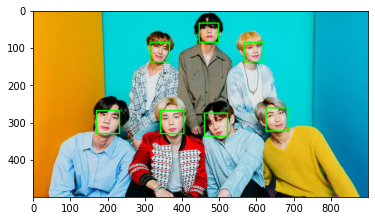

In [31]:
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1) 
print(dlib_rects)

for dlib_rect in dlib_rects:     
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType = cv2.LINE_AA)  
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 2-2) 랜드마크 검출하기

In [32]:
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)   

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  
    list_points = list(map(lambda p:(p.x, p.y), points.parts())) 
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


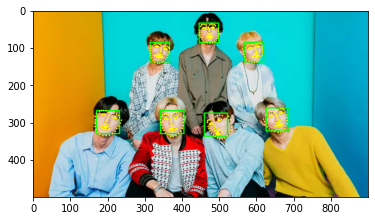

In [33]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) 
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step3. 스티커 적용 위치 확인 + 적용하기

In [34]:
# # for문을 활용하여 스티커 적용 위치와 함께 각 얼굴마다 스티커를 붙여줌
# for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
#     w = h = dlib_rect.width()
#     x = landmark[9][0]
#     refined_x = x - w//2
#     y = landmark[9][1]
#     refined_y = y - h
    
#     sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
#     img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#         np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
# plt.show()

---

# [7번 시도] 참고한 코드 활용해서 재진행

위의 코드를 참고하여 5번 사진에 스티커를 적용해보았다. 그랬더니 각 얼굴의 landmark 위치에 스티커 이미지가 잘 적용되는 것을 확인할 수 있었다.  
하지만 해당 코드로 스티커를 적용하다보니 두 사람 모두 정확한 위치에 스티커가 적용되지 않았다. 두 사람 각각의 랜드마크를 설정해서 정확한 위치에 스티커를 적용하는 방법이 있지 않을까 싶다. 해당 부분은 좀 더 찾아보거나 물어서 알아봐야겠다.

## Step1. 이미지 불러오기

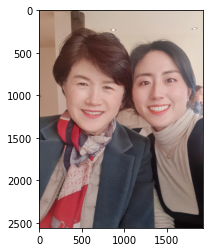

In [35]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/image4.jpg'
img_bgr = cv2.imread(my_image_path)    
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  

img_show = img_bgr.copy() 

plt.imshow(img_rgb)
plt.show()

## Step2. 얼굴 & 랜드마크 검출하기

### 2-1) bounding box 출력

rectangles[[(1019, 650) (1685, 1316)], [(354, 724) (1019, 1390)]]


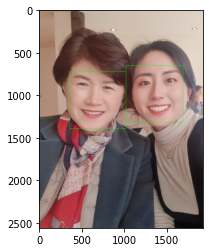

In [36]:
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)  
print(dlib_rects)

for dlib_rect in dlib_rects:     
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType = cv2.LINE_AA)  
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 2-2) 랜드마크 검출하기

In [37]:
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) 

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p:(p.x, p.y), points.parts())) 
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


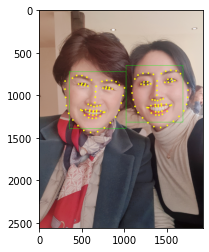

In [38]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1) 
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step3. 스티커 적용 위치 확인 + 적용하기

In [39]:
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print (img_sticker.shape)

(463, 463, 3)


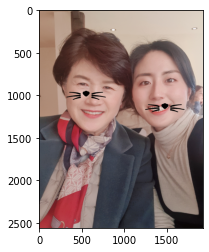

In [40]:
# for문을 활용하여 스티커 적용 위치와 함께 각 얼굴마다 스티커를 붙여줌
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[8][0] + 50
    refined_x = x - w//2
    y = landmark[8][1]
    refined_y = y - h
    w = h = dlib_rect.width()
    
    sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

---

# [8번 시도] 각도에 따라 회전

스티커를 얼굴 각도에 맞춰 회전을 시키고자 여러 방법을 찾아 시도를 하였지만, 모두 커널이 죽어서 결국 성공하지는 못하였다.  
찾아본 코드를 현재의 코드에 맞춰 변경을 해야 회전이 될 것 같은데 조금 더 찾아봐야겠다.  
각도를 우선 설정을 하고, 이후에 회전을 하는 클래스를 적용하는 방향으로 진행되야 하지 않을까 한다.

## Step1. 이미지 불러오기

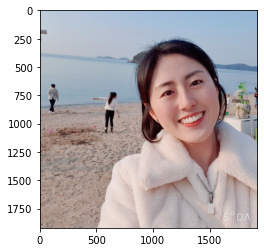

In [41]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/image7.jpg'
img_bgr = cv2.imread(my_image_path)  
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    

img_show = img_bgr.copy() 

plt.imshow(img_rgb)
plt.show()

## Step2. 얼굴 & 랜드마크 검출하기

### 2-1) bounding box 출력

rectangles[[(946, 502) (1611, 1168)]]


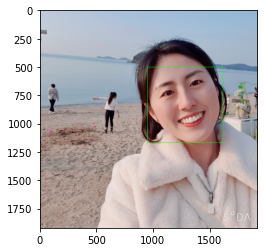

In [42]:
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1) 
print(dlib_rects)

for dlib_rect in dlib_rects:     
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType = cv2.LINE_AA)  
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 2-2) 랜드마크 검출하기

In [43]:
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)   

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  
    list_points = list(map(lambda p:(p.x, p.y), points.parts())) 
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


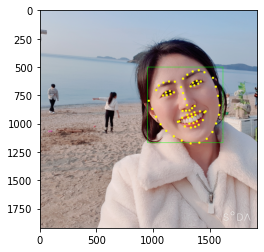

In [44]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1) 
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step3. 스티커 적용 위치 확인

In [45]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[9])
    x = landmark[9][0]
    y = landmark[9][1] + 200
    w = h = dlib_rect.width()
    print('(x, y) : (%d, %d)'%(x, y))
    print('(w, h) : (%d, %d)'%(w, h))

(1468, 1134)
(x, y) : (1468, 1334)
(w, h) : (666, 666)


## Step4. 스티커 적용하기

In [46]:
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w //2, h//2))
print (img_sticker.shape)

(333, 333, 3)


## Step4-1. 스티커 회전시키기

### (1) cv2.getRotationMatrix2D / cv2.warpAffine 클래스 활용

he kernel appears to have died. It will restart automatically 라는 경고문이 떴다.

In [47]:
# height, width, channel = img_sticker.shape
# matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 45, 1)
# dst = cv2.warpAffine(img_sticker, matrix, (width, height))

# cv2.imshow("img_sticker", img_sticker)
# cv2.imshow("dst", dst)

# cv2.waitKey()
# cv2.destroyAllWindows()

### (2) rotate 함수 활용

아래의 코드도 실행시켰더니 똑같이 커널이 죽었다...

In [48]:
# sticker_rotate = cv2.rotate(img_sticker, cv2.ROTATE_90_CLOCKWISE)
# cv2.imshow('rotate90', sticker_rotate)

# cv2.waitKey()
# cv2.destroyAllWindows()

In [49]:
refined_x = x - w//2
refined_y = y - h
print('(x, y) : (%d, %d)'%(refined_x, refined_y))

(x, y) : (1135, 668)


In [50]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

(333, 333, 3)


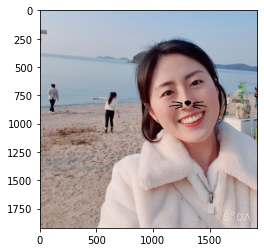

In [51]:
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

### (1) 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?

스티커의 각도를 조절을 한 뒤 스티커를 적용해야 얼굴 각도에 맞춰진다. 그렇게 하지 않으면 스티커는 얼굴 각도와는 상관없이 동일한 이미지로 적용이 된다. 그래서 [8번 시도]에서 각도를 조절하여 얼굴 이미지에 맞게 스티커를 조절하고 싶었지만 코드에 대한 이해도가 다소 부족해 코드를 적용시키지 못해서 스티커 각도를 조절하지 못하였다.

### (2) 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?

[2번 시도]에서 멀리서 촬영한 사진으로 진행하였으나, 얼굴을 찾지 못해서 bounding box를 추출해내지 못하였다. 얼굴이 이미지에서 너무 작게 있어 얼굴로 인식하지 못하였던 것 같다.  
[3번 시도]에서는 어두운 사진 + 옆 모습으로 진행을 하였는데 이것 또한 bounding box를 추출해내지 못하였다. 어두운 것이 문제인지, 옆 모습이 문제인지 하여 [4번 시도]에서 옆 모습인 사진으로 진행해보았으나 여기서는 스티커가 잘 적용이 되었다. 그래서 사진이 어두우면 얼굴을 잘 인식하지 못하였던 것 같다.  

### (3) 실행 속도가 중요할까요? 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

스티커를 적용할 때의 실행속도와 정확도는 매우 중요하다. 스티커 카메라 어플을 사용하다보면 내가 움직이는대로 빠르게 스티커도 얼굴을 따라서 움직인다. 그렇지 않으면 유저가 어플을 사용할 때 불편함을 느껴 더 이상 어플을 사용하지 않을 것 같다.

### (4) 프로젝트 후기

다양한 이미지에 스티커를 적용해보기 위해 여러 시도를 해보았다. 여러 시도를 하였지만 아쉽게도 원하는 결과가 나오진 않았다. 열심히 인터넷에서 코드를 찾아보고 그 코드를 적용해보기 위한 시도를 하였지만, 아직 코드에 대한 이해도가 낮아서 찾은 코드를 적용하는 것이 쉽지 않았다는 생각이 든다. 계속 학습을 진행하면서 코드에 대해 이해하려고 더욱 신경쓰며 공부해야겠다.

프로젝트를 진행하면서 몇 가지의 궁금증이 생겼는데, 팀원들 덕분에 해결되었다.
* 랜드마크 점이 너무 작아서 색을 변경하거나 사진을 확대하여 랜드마크가 적용이 되었는지 확인을 했었다.  
    → 몇몇 분들도 고민하던 부분이었는데, 한 분이 알려주셔서 랜드마크의 점의 굵기를 키워서 랜드마크를 잘 표현할 수 있었다.  
    
* 여러 명의 얼굴에 스티커를 적용시키려고 하였으나 한 명의 얼굴에만 스티커가 적용되었다.  
    → 이 부분도 같이 고민하다가 한 분이 참조할 수 있는 코드를 알려주셔서 덕분에 'for문'을 활용하여 코드를 작성할 수 있었다.

### (5) 추가로 공부해야 할 것

* ValueError: operands could not be broadcast together with shapes (333,333,3) (333,333,3) (241,260,3)  
    → 해당 에러에 대한 해결책 찾을 것. +) broadcasting에 대해 공부 [6번 시도]  

* 두 사람의 랜드마크를 각각 설정하여 정확한 위치에 스티커를 적용하기 [7번 시도]  

* 스티커 이미지를 회전하여 얼굴 각도에 맞게 스티커 적용하기 [8번 시도]